In [3411]:
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3412]:
df = pd.read_csv(r'/Users/xuzhejia/Desktop/商務數據/cmc_2.csv')

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3413]:
df

,year,month,day,brand,origin,type2,type3,type4,number,oil,...,gdp,income average,covid,industry,signal,lead,unemployement,unem,stock,return
0,2012,1,1,ABARTH,進口,轎車,ECOI,695 TRIBUTO FERRARI,1,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
1,2012,1,1,ASTON MARTIN,進口,轎車,SPORTS CAR,VANTAGE,1,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
2,2012,1,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,8,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
3,2012,1,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0T QUATTRO,1,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
4,2012,1,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.0,8,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176985,2022,3,6,VW,進口,RV車,SU,KOMBI 2.0,10,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339
176986,2022,3,6,VW,進口,RV車,SU,MULTIVAN 2.0,4,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339
176987,2022,3,6,VW,進口,RV車,SU,TOURAN 1.5 TSI,2,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339
176988,2022,3,6,東風小康,國產,商車,小,大穩發鐵床,16,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339


In [3414]:
df.columns

Index(['year', 'month', 'day', 'brand', 'origin', 'type2', 'type3', 'type4',
       'number', 'oil', 'steel', 'import', 'export', 'goods', 'CPI', 'CPIT',
       'economicgrowth', 'gdp', 'income average', 'covid', 'industry',
       'signal', 'lead', 'unemployement', 'unem', 'stock', 'return'],
      dtype='object')

In [3415]:
group = df.groupby(['year','month'])
group_year = []
group_month = []
group_sum = []
group_oil = []
group_steel = []
group_CPI = []
group_CPIT = []
group_economicgrowth = []
group_gdp = []
group_incomeaverage = []
group_covid = []
group_industry = []
group_stock = []
for x,y in group:
    group_year.append(list(group.get_group(x)['year'])[0])
    group_month.append(list(group.get_group(x)['month'])[0])
    group_sum.append(group.get_group(x)['number'].sum())
    group_oil.append(list(group.get_group(x)['oil'])[0])
    group_steel.append(list(group.get_group(x)['steel'])[0])
    group_CPI.append(list(group.get_group(x)['CPI'])[0])
    group_CPIT.append(list(group.get_group(x)['CPIT'])[0])
    group_economicgrowth.append(list(group.get_group(x)['economicgrowth'])[0])
    group_gdp.append(list(group.get_group(x)['gdp'])[0])
    group_incomeaverage.append(list(group.get_group(x)['income average'])[0])
    group_covid.append(list(group.get_group(x)['covid'])[0])
    group_industry.append(list(group.get_group(x)['industry'])[0])
    group_stock.append(list(group.get_group(x)['stock'])[0])

In [3416]:
df_groupby = pd.DataFrame([group_year,group_month,group_sum,group_oil,group_steel,group_CPI,group_CPIT,group_economicgrowth,group_gdp,group_incomeaverage,
group_covid,group_industry,group_stock]).T
df_groupby.columns = ['year','month','sum','oil','steel','CPI','CPIT','economicgrowth','gdp','incomeaverage','covid','industry','stock']

In [3417]:
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock
0,2012.0,1.0,40134.0,110.63,24000.0,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08
1,2012.0,2.0,21369.0,122.68,24000.0,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44
2,2012.0,3.0,32029.0,123.15,24000.0,95.09,106.86,1.09,0.59,133393.0,0.0,84.12,8121.44
3,2012.0,4.0,27782.0,119.04,24500.0,96.09,109.17,1.04,2.6,130318.0,0.0,91.46,7501.72
4,2012.0,5.0,30129.0,101.75,24500.0,96.57,108.16,1.04,2.6,130318.0,0.0,94.52,7301.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2021,11,38667,70.83,30479,105.62,107.16,4.86,8.68,214296.0,192.0,137.05,17427.76
119,2021,12,38807,77.33,30479,105.41,105.62,4.86,8.68,214296.0,441.0,140.78,18218.84
120,2022,1,39654,92.34,"29,979",106.01,107.46,3.06,NaN,NaN,NaN,138.97,17674.4
121,2022,2,23493,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18


In [3418]:
df_groupby['year'] = df_groupby['year'].astype(str)
df_groupby['month'] = df_groupby['month'].astype(str)
df_groupby['year'] = df_groupby['year'].apply(lambda x:x.replace('.0',""))
df_groupby['month'] = df_groupby['month'].apply(lambda x:x.replace('.0',""))

In [3419]:
df_groupby['date'] = df_groupby['year'] +'/' + df_groupby['month']
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,date
0,2012,1,40134.0,110.63,24000.0,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,2012/1
1,2012,2,21369.0,122.68,24000.0,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,2012/2
2,2012,3,32029.0,123.15,24000.0,95.09,106.86,1.09,0.59,133393.0,0.0,84.12,8121.44,2012/3
3,2012,4,27782.0,119.04,24500.0,96.09,109.17,1.04,2.6,130318.0,0.0,91.46,7501.72,2012/4
4,2012,5,30129.0,101.75,24500.0,96.57,108.16,1.04,2.6,130318.0,0.0,94.52,7301.5,2012/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2021,11,38667,70.83,30479,105.62,107.16,4.86,8.68,214296.0,192.0,137.05,17427.76,2021/11
119,2021,12,38807,77.33,30479,105.41,105.62,4.86,8.68,214296.0,441.0,140.78,18218.84,2021/12
120,2022,1,39654,92.34,"29,979",106.01,107.46,3.06,NaN,NaN,NaN,138.97,17674.4,2022/1
121,2022,2,23493,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,2022/2


In [3420]:
df_groupby.set_index(pd.to_datetime(df_groupby['date'],format = '%Y/%m'),inplace = True)

In [3421]:
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,date
date,,,,,,,,,,,,,,
2012-01-01,2012,1,40134.0,110.63,24000.0,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,2012/1
2012-02-01,2012,2,21369.0,122.68,24000.0,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,2012/2
2012-03-01,2012,3,32029.0,123.15,24000.0,95.09,106.86,1.09,0.59,133393.0,0.0,84.12,8121.44,2012/3
2012-04-01,2012,4,27782.0,119.04,24500.0,96.09,109.17,1.04,2.6,130318.0,0.0,91.46,7501.72,2012/4
2012-05-01,2012,5,30129.0,101.75,24500.0,96.57,108.16,1.04,2.6,130318.0,0.0,94.52,7301.5,2012/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,2021,11,38667,70.83,30479,105.62,107.16,4.86,8.68,214296.0,192.0,137.05,17427.76,2021/11
2021-12-01,2021,12,38807,77.33,30479,105.41,105.62,4.86,8.68,214296.0,441.0,140.78,18218.84,2021/12
2022-01-01,2022,1,39654,92.34,"29,979",106.01,107.46,3.06,NaN,NaN,NaN,138.97,17674.4,2022/1


In [3422]:
df_groupby.loc['2019-01-01':,:]

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,date
date,,,,,,,,,,,,,,
2019-01-01,2019,1,43184.0,62.51,24311.0,101.39,102.22,2.05,1.82,169005.0,0.0,107.2,9932.26,2019/1
2019-02-01,2019,2,18975.0,65.33,24311.0,102.38,102.81,2.05,1.82,169005.0,0.0,85.59,10389.17,2019/2
2019-03-01,2019,3,31296.0,68.38,24311.0,101.74,102.8,2.05,1.82,169005.0,0.0,104.23,10641.04,2019/3
2019-04-01,2019,4,33515.0,72.73,24311.0,102.5,103.68,2.99,2.95,169305.0,0.0,103.66,10967.73,2019/4
2019-05-01,2019,5,36507.0,66.44,24311.0,102.64,103.66,2.99,2.95,169305.0,0.0,108.54,10498.49,2019/5
2019-06-01,2019,6,37149.0,67.28,24311.0,102.98,102.93,2.99,2.95,169305.0,0.0,106.64,10730.83,2019/6
2019-07-01,2019,7,47146.0,63.99,23782.0,102.86,103.97,3.43,3.75,170499.0,0.0,113.69,10823.81,2019/7
2019-08-01,2019,8,23102.0,61.12,23782.0,102.84,102.75,3.43,3.75,170499.0,0.0,115.57,10618.05,2019/8
2019-09-01,2019,9,31635.0,61.34,23782.0,103.0,101.73,3.43,3.75,170499.0,0.0,110.85,10829.68,2019/9


In [3423]:
#多增加一個column 為恐慌
恐慌 = []
for x in df_groupby.index:
    if str(x) in ['2020-01-01 00:00:00']:
        恐慌.append(1)
        print('a')
    elif str(x) in ['2021-05-01 00:00:00','2021-06-01 00:00:00','2021-07-01 00:00:00']:  #'2021-07-01 00:00:00','2021-08-01 00:00:00','2021-09-01'
        恐慌.append(-3)
    elif str(x) in ['2021-08-01 00:00:00','2021-09-01 00:00:00','2021-10-01 00:00:00','2021-11-01 00:00:00','2021-12-01 00:00:00']:
        恐慌.append(-1.2)
    else:
        恐慌.append(0)
塞港 = []
for x in df_groupby.index:
    if str(x) in ['2021-06-01 00:00:00']:
        塞港.append(1)
    elif str(x) in ['2021-07-01 00:00:00','2021-08-01 00:00:00','2021-12-01 00:00:00','2022-01-01 00:00:00']:
        塞港.append(1)
    else:
        塞港.append(0)
df_groupby['恐慌'] = 恐慌
df_groupby['塞港'] = 塞港

a


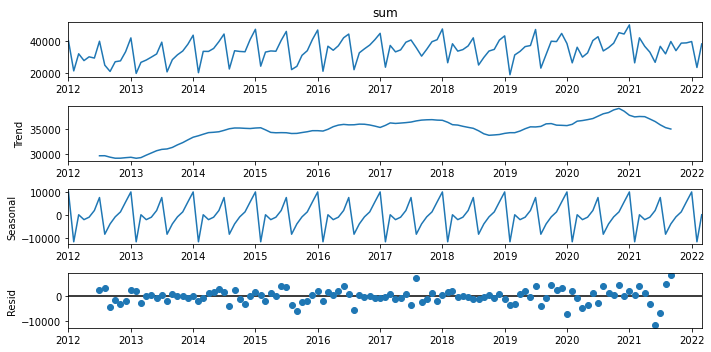

<Figure size 2880x720 with 0 Axes>

In [3424]:
result = seasonal_decompose(df_groupby['sum'],model='additive', period=12)
rcParams['figure.figsize'] = 10, 5
result.plot()
plt.figure(figsize=(40,10))
plt.show()

In [3425]:
#一階差分為定態
adfuller(df_groupby['sum'].diff()[1:])

(-7.848408305512096,
 5.6868699762584725e-12,
 10,
 111,
 {'1%': -3.490683082754047,
  '5%': -2.8879516565798817,
  '10%': -2.5808574442009578},
 2116.012343782353)

In [3426]:
df_groupby['steel'] = df_groupby['steel'].astype(str).apply(lambda x:x.replace(",",'')).astype(float)

In [3427]:
#標準化
sc = StandardScaler()
df_groupby['oil_sc'] = sc.fit_transform(df_groupby['oil'].values.reshape(-1,1))
df_groupby['steel_sc'] = sc.fit_transform(df_groupby['steel'].values.reshape(-1,1))
df_groupby['CPI_sc'] = sc.fit_transform(df_groupby['CPI'].values.reshape(-1,1))
df_groupby['CPIT_sc'] = sc.fit_transform(df_groupby['CPIT'].values.reshape(-1,1))
df_groupby['economicgrowth_sc'] = sc.fit_transform(df_groupby['CPIT'].values.reshape(-1,1))
df_groupby['gdp_sc'] = sc.fit_transform(df_groupby['gdp'].values.reshape(-1,1))
df_groupby['incomeaverage_sc'] = sc.fit_transform(df_groupby['incomeaverage'].values.reshape(-1,1))
df_groupby['covid_sc'] = sc.fit_transform(df_groupby['covid'].values.reshape(-1,1))
df_groupby['industry_sc'] = sc.fit_transform(df_groupby['industry'].values.reshape(-1,1))
df_groupby['stock_sc'] = sc.fit_transform(df_groupby['stock'].values.reshape(-1,1))
df_groupby['last_sell'] = df_groupby['sum'].shift(1)
df_groupby['恐慌_last_month'] = df_groupby['恐慌'].shift(1)
df_groupby['塞港_last_month'] = df_groupby['塞港'].shift(1)

In [3428]:
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,...,CPIT_sc,economicgrowth_sc,gdp_sc,incomeaverage_sc,covid_sc,industry_sc,stock_sc,last_sell,恐慌_last_month,塞港_last_month
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,40134.0,110.63,24000.0,96.37,106.78,1.09,3573234.0,133393.0,...,0.839316,0.839316,7.681146,-1.597193,-0.159479,-1.975550,-1.052225,NaN,NaN,NaN
2012-02-01,2012,2,21369.0,122.68,24000.0,95.09,106.86,1.09,3573234.0,133393.0,...,0.861752,0.861752,7.681146,-1.597193,-0.159479,-1.537102,-0.840144,40134.0,0.0,0.0
2012-03-01,2012,3,32029.0,123.15,24000.0,95.09,106.86,1.09,0.59,133393.0,...,0.861752,0.861752,-0.130197,-1.597193,-0.159479,-1.537102,-0.840144,21369.0,0.0,0.0
2012-04-01,2012,4,27782.0,119.04,24500.0,96.09,109.17,1.04,2.6,130318.0,...,1.509565,1.509565,-0.130193,-1.758702,-0.159479,-1.004285,-1.057615,32029.0,0.0,0.0
2012-05-01,2012,5,30129.0,101.75,24500.0,96.57,108.16,1.04,2.6,130318.0,...,1.226322,1.226322,-0.130193,-1.758702,-0.159479,-0.782157,-1.127876,27782.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,2021,11,38667,70.83,30479.0,105.62,107.16,4.86,8.68,214296.0,...,0.945883,0.945883,-0.130180,2.652094,0.056968,2.305131,2.425611,33973,-1.2,0.0
2021-12-01,2021,12,38807,77.33,30479.0,105.41,105.62,4.86,8.68,214296.0,...,0.514007,0.514007,-0.130180,2.652094,0.337672,2.575895,2.703215,38667,-1.2,0.0
2022-01-01,2022,1,39654,92.34,29979.0,106.01,107.46,3.06,NaN,NaN,...,1.030015,1.030015,NaN,NaN,NaN,2.444505,2.512161,38807,-1.2,1.0


In [3429]:
df_groupby.columns

Index(['year', 'month', 'sum', 'oil', 'steel', 'CPI', 'CPIT', 'economicgrowth',
       'gdp', 'incomeaverage', 'covid', 'industry', 'stock', 'date', '恐慌',
       '塞港', 'oil_sc', 'steel_sc', 'CPI_sc', 'CPIT_sc', 'economicgrowth_sc',
       'gdp_sc', 'incomeaverage_sc', 'covid_sc', 'industry_sc', 'stock_sc',
       'last_sell', '恐慌_last_month', '塞港_last_month'],
      dtype='object')

In [3430]:
df_model = df_groupby.loc[:,['sum','oil_sc','steel_sc','CPI_sc','CPIT_sc','economicgrowth_sc','gdp_sc',
'incomeaverage_sc','covid_sc','industry_sc','stock_sc','last_sell','恐慌_last_month','塞港_last_month']]

In [3431]:
df_model

,sum,oil_sc,steel_sc,CPI_sc,CPIT_sc,economicgrowth_sc,gdp_sc,incomeaverage_sc,covid_sc,industry_sc,stock_sc,last_sell,恐慌_last_month,塞港_last_month
date,,,,,,,,,,,,,,
2012-01-01,40134.0,1.457634,0.456439,-1.683748,0.839316,0.839316,7.681146,-1.597193,-0.159479,-1.975550,-1.052225,NaN,NaN,NaN
2012-02-01,21369.0,1.919145,0.456439,-2.205587,0.861752,0.861752,7.681146,-1.597193,-0.159479,-1.537102,-0.840144,40134.0,0.0,0.0
2012-03-01,32029.0,1.937146,0.456439,-2.205587,0.861752,0.861752,-0.130197,-1.597193,-0.159479,-1.537102,-0.840144,21369.0,0.0,0.0
2012-04-01,27782.0,1.779734,0.628721,-1.797900,1.509565,1.509565,-0.130193,-1.758702,-0.159479,-1.004285,-1.057615,32029.0,0.0,0.0
2012-05-01,30129.0,1.117532,0.628721,-1.602210,1.226322,1.226322,-0.130193,-1.758702,-0.159479,-0.782157,-1.127876,27782.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,38667,-0.066694,2.688872,2.087358,0.945883,0.945883,-0.130180,2.652094,0.056968,2.305131,2.425611,33973,-1.2,0.0
2021-12-01,38807,0.182254,2.688872,2.001743,0.514007,0.514007,-0.130180,2.652094,0.337672,2.575895,2.703215,38667,-1.2,0.0
2022-01-01,39654,0.757132,2.516590,2.246356,1.030015,1.030015,NaN,NaN,NaN,2.444505,2.512161,38807,-1.2,1.0


In [3432]:
df_model['diff'] = df_model['sum'].diff()


In [3433]:
df_model['oil_sc_last_month'] = df_model['oil_sc'].shift()
df_model['steel_sc_last_month'] = df_model['steel_sc'].shift()
df_model['CPI_sc_last_month'] = df_model['CPI_sc'].shift()
df_model['economicgrowth_sc_last_month'] = df_model['economicgrowth_sc'].shift()
df_model['gdp_sc_last_month'] = df_model['gdp_sc'].shift()
df_model['incomeaverage_sc_last_month'] = df_model['incomeaverage_sc'].shift()
df_model['covid_sc_last_month'] = df_model['covid_sc'].shift()
df_model['industry_sc_last_month'] = df_model['industry_sc'].shift()
df_model['stock_sc_last_month'] = df_model['stock_sc'].shift()
df_model['CPIT_sc_last_month'] = df_model['CPIT_sc'].shift()

In [3434]:
df_model = df_model.iloc[1:,:]
df_model

,sum,oil_sc,steel_sc,CPI_sc,CPIT_sc,economicgrowth_sc,gdp_sc,incomeaverage_sc,covid_sc,industry_sc,...,oil_sc_last_month,steel_sc_last_month,CPI_sc_last_month,economicgrowth_sc_last_month,gdp_sc_last_month,incomeaverage_sc_last_month,covid_sc_last_month,industry_sc_last_month,stock_sc_last_month,CPIT_sc_last_month
date,,,,,,,,,,,,,,,,,,,,,
2012-02-01,21369.0,1.919145,0.456439,-2.205587,0.861752,0.861752,7.681146,-1.597193,-0.159479,-1.537102,...,1.457634,0.456439,-1.683748,0.839316,7.681146,-1.597193,-0.159479,-1.975550,-1.052225,0.839316
2012-03-01,32029.0,1.937146,0.456439,-2.205587,0.861752,0.861752,-0.130197,-1.597193,-0.159479,-1.537102,...,1.919145,0.456439,-2.205587,0.861752,7.681146,-1.597193,-0.159479,-1.537102,-0.840144,0.861752
2012-04-01,27782.0,1.779734,0.628721,-1.797900,1.509565,1.509565,-0.130193,-1.758702,-0.159479,-1.004285,...,1.937146,0.456439,-2.205587,0.861752,-0.130197,-1.597193,-0.159479,-1.537102,-0.840144,0.861752
2012-05-01,30129.0,1.117532,0.628721,-1.602210,1.226322,1.226322,-0.130193,-1.758702,-0.159479,-0.782157,...,1.779734,0.628721,-1.797900,1.509565,-0.130193,-1.758702,-0.159479,-1.004285,-1.057615,1.509565
2012-06-01,29362.0,0.902288,0.628721,-1.349444,0.889795,0.889795,-0.130193,-1.758702,-0.159479,-1.161807,...,1.117532,0.628721,-1.602210,1.226322,-0.130193,-1.758702,-0.159479,-0.782157,-1.127876,1.226322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,38667,-0.066694,2.688872,2.087358,0.945883,0.945883,-0.130180,2.652094,0.056968,2.305131,...,0.414350,2.688872,1.985436,0.693488,-0.130180,2.652094,0.046822,2.199874,2.271084,0.693488
2021-12-01,38807,0.182254,2.688872,2.001743,0.514007,0.514007,-0.130180,2.652094,0.337672,2.575895,...,-0.066694,2.688872,2.087358,0.945883,-0.130180,2.652094,0.056968,2.305131,2.425611,0.945883
2022-01-01,39654,0.757132,2.516590,2.246356,1.030015,1.030015,NaN,NaN,NaN,2.444505,...,0.182254,2.688872,2.001743,0.514007,-0.130180,2.652094,0.337672,2.575895,2.703215,0.514007


In [3435]:
#build model
auto_arima(df_model['diff'],seasonal=True,m = 12).summary() #12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  122
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1069.041
Date:                            Fri, 13 May 2022   AIC                           2144.083
Time:                                    16:10:09   BIC                           2152.184
Sample:                                         0   HQIC                          2147.369
                                            - 122                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7258      0.057    -12.718      0.000      -0.838      -0.614
ma.S.L12      -0.6048      0.088     -6.887      0.000      -0.777      -0.433
sigma2      1.564e+07   1.76e+06      8.902      0.000    1.22e+07    1.91e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                15.21
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                            -0.35
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [3436]:
df_model['last_sell'] = df_model['last_sell'].astype(int)

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_63758/798707937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['last_sell'] = df_model['last_sell'].astype(int)


In [3437]:
# 5,1,5 6,1,3,12
s = SARIMAX(
            df_model.loc[:'2018-01-01','sum'].astype(int).values,
            order = (5,1,5),
            seasonal_order=(6,1,3,12),
            exog = df_model.loc[:'2018-01-01',[
                                 'oil_sc_last_month',
                                 'last_sell',
                                 'economicgrowth_sc_last_month',
                                 'covid_sc_last_month',
                                 'incomeaverage_sc_last_month',
                                 'CPIT_sc_last_month',
                                 '恐慌_last_month',
                                 '塞港_last_month']],
            trend = 'n',
            time_varying_regression=True,
            mle_regression=False,
            measurement_error = True
           )

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [3438]:
result = s.fit()
result.summary()

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.20911D+00    |proj g|=  6.50321D-01


 This problem is unconstrained.



At iterate    5    f=  6.89182D+00    |proj g|=  1.85572D-01

At iterate   10    f=  6.84737D+00    |proj g|=  2.17776D-01

At iterate   15    f=  6.82620D+00    |proj g|=  1.20034D-01

At iterate   20    f=  6.80073D+00    |proj g|=  7.19094D-02

At iterate   25    f=  6.76065D+00    |proj g|=  8.06782D-01

At iterate   30    f=  6.73235D+00    |proj g|=  8.44059D-02

At iterate   35    f=  6.71449D+00    |proj g|=  1.28228D-01

At iterate   40    f=  6.71386D+00    |proj g|=  8.05458D-02

At iterate   45    f=  6.71368D+00    |proj g|=  5.66148D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.71367D+00    |proj g|=  1.46123D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   29     50    108      1     0     0   1.461D-01   6.714D+00
  F =   6.7136743982487488     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                   72
Model:             SARIMAX(5, 1, 5)x(6, 1, [1, 2, 3], 12)   Log Likelihood                -483.385
Date:                                    Fri, 13 May 2022   AIC                           1024.769
Time:                                            16:11:17   BIC                           1080.792
Sample:                                        02-01-2012   HQIC                          1046.177
                                             - 01-01-2018                                         
Covariance Type:                                      opg                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
ar.L1                               -1.2972      1.441     -0.900      0.368      -4.121       1.527
ar.L2                               -1.5046      0.903     -1.666      0.096      -3.274       0.265
ar.L3                               -1.5102      1.638     -0.922      0.357      -4.721       1.700
ar.L4                               -1.2609      1.037     -1.216      0.224      -3.294       0.772
ar.L5                               -0.8080      1.600     -0.505      0.614      -3.944       2.328
ma.L1                                0.0951      0.660      0.144      0.885      -1.198       1.388
ma.L2                               -0.0700      0.760     -0.092      0.927      -1.559       1.419
ma.L3                                0.0102      0.964      0.011      0.992      -1.879       1.900
ma.L4                               -0.0588      0.888     -0.066      0.947      -1.800       1.682
ma.L5                               -0.2975      0.626     -0.475      0.635      -1.525       0.930
ar.S.L12                            -1.0097      1.715     -0.589      0.556      -4.372       2.353
ar.S.L24                            -0.9255      3.389     -0.273      0.785      -7.569       5.718
ar.S.L36                            -0.7959      4.501     -0.177      0.860      -9.618       8.026
ar.S.L48                            -0.6726      6.178     -0.109      0.913     -12.781      11.435
ar.S.L60                            -0.2297      6.838     -0.034      0.973     -13.632      13.173
ar.S.L72                             0.0640      4.466      0.014      0.989      -8.688       8.817
ma.S.L12                             0.0758      0.529      0.143      0.886      -0.961       1.112
ma.S.L24                             0.0115      0.642      0.018      0.986      -1.247       1.270
ma.S.L36                             0.0908      0.867      0.105      0.917      -1.608       1.789
var.oil_sc_last_month                1.0000   4.81e-05   2.08e+04      0.000       1.000       1.000
var.last_sell                     6.798e-10      0.001   5.51e-07      1.000      -0.002       0.002
var.economicgrowth_sc_last_month     1.0000   5.58e-05   1.79e+04      0.000       1.000       1.000
var.covid_sc_last_month              1.0000   4.06e-05   2.46e+04      0.000       1.000       1.000
var.incomeaverage_sc_last_month      1.0000    3.4e-05   2.94e+04      0.000       1.000       1.000
var.CPIT_sc_last_month               1.0000   5.58e-05   1.79e+04      0.000       1.000       1.000
var.恐慌_last_month                    1.0000   4.03e-05   2.48e+04      0.000       1.000       1.000
var.塞港_last_month                    1.0000   4.03e-05   2.48e+04      0.000       1.000       1.000
var.measurement_error          

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


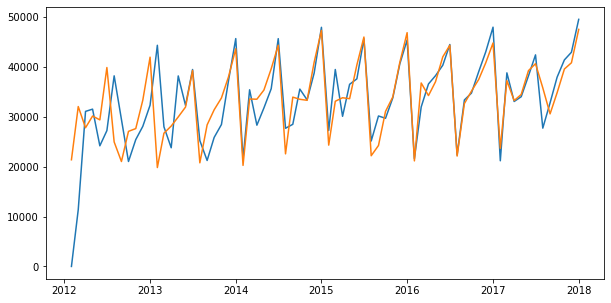

In [3439]:
ans = result.predict(start = '2012-02-01',end = '2018-01-01')
plt.plot(df_model.loc['2012-02-01':'2018-01-01',:].index,ans)
plt.plot(df_model.loc['2012-02-01':'2018-01-01',:].index,df_model.loc['2012-02-01':'2018-01-01','sum'])

In [3440]:
ans = result.get_forecast(steps = 47, exog = df_model.loc['2018-02-01':'2021-12-01',[
                                 'oil_sc_last_month',
                                 'last_sell',
                                 'economicgrowth_sc_last_month',
                                 'covid_sc_last_month',
                                 'incomeaverage_sc_last_month',
                                 'CPIT_sc_last_month',
                                 '恐慌_last_month',
                                 '塞港_last_month']])

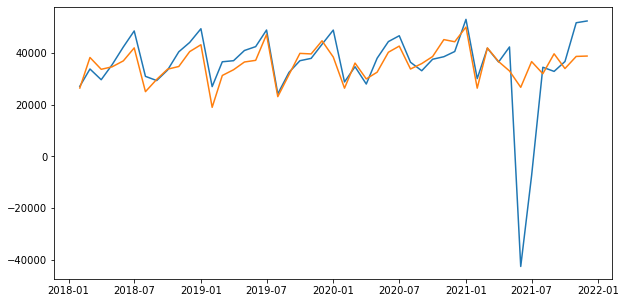

In [3441]:
plt.plot(df_model.loc['2018-02-01':'2021-12-01','sum'].index,ans.predicted_mean)
plt.plot(df_model.loc['2018-02-01':'2021-12-01','sum'].index,df_model.loc['2018-02-01':'2021-12-01','sum'])

In [3442]:
mape = []
np.mean(np.abs((ans.predicted_mean[8:-8] - df_model.loc['2018-02-01':'2021-12-01','sum'][8:-8]))/ df_model.loc['2018-02-01':'2021-12-01','sum'][8:-8])

0.09906505472129722

In [3402]:
#feasible 1,0,1,0,1,1,12
ans_ans = []
for x in range(71,len(df_model.index)-4):  #4
    s = SARIMAX(
                df_model.loc[:df_model.index[x],'sum'].astype(int).values,
                order = (0,0,1),
                seasonal_order=(0,1,1,12),
                exog = df_model.loc[:df_model.index[x],[
                                    'oil_sc_last_month',
                                    'last_sell',
                                    'economicgrowth_sc_last_month',
                                    'incomeaverage_sc_last_month',
                                    'CPI_sc_last_month',
                                    '恐慌_last_month',
                                    '塞港_last_month']],
                trend = 'n',
                time_varying_regression=True,
                mle_regression=False,
                measurement_error = True,
                enforce_stationary = False
            )
    result = s.fit()
    ans = result.get_forecast(steps = 1, exog = df_model.loc[df_model.index[x+1],[
                                 'oil_sc_last_month',
                                 'last_sell',
                                 'economicgrowth_sc_last_month',
                                 'incomeaverage_sc_last_month',
                                 'CPI_sc_last_month',
                                 '恐慌_last_month',
                                 '塞港_last_month']].astype(float))
    ans_ans.append(ans.predicted_mean.values[0])


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51718D+00    |proj g|=  6.76292D-01

At iterate    5    f=  7.09597D+00    |proj g|=  6.20401D-03

At iterate   10    f=  7.09593D+00    |proj g|=  2.78555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     12     30      1     0     0   2.203D-04   7.096D+00
  F =   7.0959254797870441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.12365D+00    |proj g|=  1.04238D-02

At iterate   10    f=  7.12362D+00    |proj g|=  5.59142D-02

At iterate   15    f=  7.12359D+00    |proj g|=  2.37132D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     16     19      1     0     0   3.851D-06   7.124D+00
  F =   7.1235948023546376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.59884D+00    |proj g|=  6.84394D-01

At iterate    5    f=  7.14921D+00    |proj g|=  1.56951D-03

At iterate   10    f=  7.14918D+00    |proj g|=  4.19051D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     10     14      1     0     0   4.191D-06   7.149D+00
  F =   7.1491844538565061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.17662D+00    |proj g|=  1.96894D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6     18      1     0     0   5.398D-03   7.177D+00
  F =   7.1766247207780252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.67543D+00    |proj g|=  6.91734D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.20816D+00    |proj g|=  9.08885D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5      8      1     0     0   9.089D-05   7.208D+00
  F =   7.2081612507828305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.71172D+00    |proj g|=  6.94970D-01

At iterate    5    f=  7.24617D+00    |proj g|=  1.06138D-02

At iterate   10    f=  7.24567D+00    |proj g|=  3.49613D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     11     44      1     0     0   9.614D-02   7.246D+00
  F =   7.2456679897484326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.26983D+00    |proj g|=  2.42338D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      8     24      1     0     0   9.665D-02   7.269D+00
  F =   7.2692697220198186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78726D+00    |proj g|=  6.97386D-01

At iterate    5    f=  7.35808D+00    |proj g|=  6.18304D-02

At iterate   10    f=  7.34832D+00    |proj g|=  3.10508D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.37817D+00    |proj g|=  7.35378D-02

At iterate   10    f=  7.37160D+00    |proj g|=  8.94748D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     11     26      1     0     0   7.080D-02   7.372D+00
  F =   7.3715998293809548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.84831D+00    |proj g|=  7.03258D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.40487D+00    |proj g|=  1.52297D-01

At iterate   10    f=  7.39590D+00    |proj g|=  4.20267D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     11     30      1     0     0   1.908D-01   7.396D+00
  F =   7.3958979266149560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88202D+00    |proj g|=  7.04090D-01

At iterate    5    f=  7.43881D+00    |proj g|=  1.15548D-01

At iterate   10    f=  7.42046D+00    |proj g|=  3.01145D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     14     32      1     0     0   8.487D-05   7.420D+00
  F =   7.4204528572929025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.45899D+00    |proj g|=  1.12113D-01

At iterate   10    f=  7.44219D+00    |proj g|=  3.34004D-02

At iterate   15    f=  7.44217D+00    |proj g|=  6.46966D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     18     45      1     0     0   8.813D-04   7.442D+00
  F =   7.4421680688430110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.94523D+00    |proj g|=  7.10910D-01

At iterate    5    f=  7.48242D+00    |proj g|=  6.93348D-02

At iterate   10    f=  7.46584D+00    |proj g|=  1.28458D-01

At iterate   15    f=  7.46546D+00    |proj g|=  8.43143D-03

At iterate   20    f=  7.46546D+00    |proj g|=  9.45297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     20     54      1     0     0   9.453D-04   7.465D+00
  F =   7.4654597147166495     

CONVERG

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.51267D+00    |proj g|=  5.81906D-02

At iterate   10    f=  7.50731D+00    |proj g|=  5.24924D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     12     46      1     0     0   4.865D-02   7.507D+00
  F =   7.5073049486087378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00425D+00    |proj g|=  7.12159D-01

At iterate    5    f=  7.56103D+00    |proj g|=  7.91423D-02

At iterate   10    f=  7.55379D+00    |proj g|=  1.93425D-02

At iterate   15    f=  7.55379D+00    |proj g|=  6.02671D-04

       

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.59075D+00    |proj g|=  2.28018D-01

At iterate   10    f=  7.57305D+00    |proj g|=  1.14298D-01

At iterate   15    f=  7.57290D+00    |proj g|=  2.73711D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     15     28      1     0     0   2.737D-05   7.573D+00
  F =   7.5729046220816514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05921D+00    |proj g|=  7.17458D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.60840D+00    |proj g|=  2.49548D-01

At iterate   10    f=  7.59015D+00    |proj g|=  2.30627D-01

At iterate   15    f=  7.58999D+00    |proj g|=  1.61430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     15     33      1     0     0   1.614D-04   7.590D+00
  F =   7.5899906871454679     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.08749D+00    |proj g|=  7.18829D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.62885D+00    |proj g|=  1.34565D-01

At iterate   10    f=  7.60748D+00    |proj g|=  7.31097D-02

At iterate   15    f=  7.60736D+00    |proj g|=  1.44088D-02

At iterate   20    f=  7.60736D+00    |proj g|=  4.46326D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     20     51      1     0     0   4.463D-04   7.607D+00
  F =   7.6073564391986634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.11553D+00    |proj g|=  7.19843D-01

At iterate    5    f=  7.65633D+00    |proj g|=  1.77597D-01

At iterate   10    f=  7.63049D+00    |proj g|=  1.15085D-01

At iterate   15    f=  7.63023D+00    |proj g|=  3.25055D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     17     37      1     0     0   3.522D-04   7.630D+00
  F =   7.6302320343455978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14565D+00    |proj g|=  7.21063D-01

At iterate    5    f=  7.66095D+00    |proj g|=  3.59769D-01

At iterate   10    f=  7.65075D+00    |proj g|=  2.26129D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     13     27      1     0     0   5.184D-05   7.651D+00
  F =   7.6507489003204929     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.16691D+00    |proj g|=  7.23421D-01

At iterate    5    f=  7.67775D+00    |proj g|=  3.75943D-01

At iterate   10    f=  7.66620D+00    |proj g|=  2.16051D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     14     29      1     0     0   5.207D-04   7.666D+00
  F =   7.6661948741364876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19131D+00    |proj g|=  7.24826D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  7.70004D+00    |proj g|=  7.04854D-02

At iterate   10    f=  7.69887D+00    |proj g|=  5.00787D-02

At iterate   15    f=  7.69509D+00    |proj g|=  3.38764D-01

At iterate   20    f=  7.69465D+00    |proj g|=  2.50275D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     20     56      2     0     0   2.503D-05   7.695D+00
  F =   7.6946467076501603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.21718D+00    |proj g|=  7.26761D-01

At iterate    5    f=  7.71298D+00    |proj g|=  7.69036D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      9     32      1     0     0   1.073D-01   7.713D+00
  F =   7.7127697312222692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 v

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.73930D+00    |proj g|=  1.15846D-01

At iterate   10    f=  7.72741D+00    |proj g|=  2.31754D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     12     56      1     0     0   5.427D-02   7.727D+00
  F =   7.7274103829449112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.26678D+00    |proj g|=  7.32755D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.78454D+00    |proj g|=  1.06241D-01

At iterate   10    f=  7.76730D+00    |proj g|=  7.89651D-02

At iterate   15    f=  7.76723D+00    |proj g|=  8.26233D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     15     25      1     0     0   8.262D-05   7.767D+00
  F =   7.7672259554702885     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.30035D+00    |proj g|=  7.27078D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.83453D+00    |proj g|=  3.09619D-01

At iterate   10    f=  7.81536D+00    |proj g|=  2.78330D-01

At iterate   15    f=  7.81495D+00    |proj g|=  1.84190D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     15     29      1     0     0   1.842D-04   7.815D+00
  F =   7.8149537114387364     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.32306D+00    |proj g|=  7.28019D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.85877D+00    |proj g|=  9.50820D-02

At iterate   10    f=  7.84362D+00    |proj g|=  1.87283D-01

At iterate   15    f=  7.84348D+00    |proj g|=  2.87548D-03

At iterate   20    f=  7.84347D+00    |proj g|=  2.38944D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     21     45      1     0     0   5.664D-02   7.843D+00
  F =   7.8434734506316799     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.86764D+00    |proj g|=  6.86552D-02

At iterate   10    f=  7.85798D+00    |proj g|=  8.54184D-03

At iterate   15    f=  7.85798D+00    |proj g|=  6.22864D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     15     36      1     0     0   6.229D-04   7.858D+00
  F =   7.8579829782454658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.36703D+00    |proj g|=  7.31255D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.88988D+00    |proj g|=  9.81646D-02

At iterate   10    f=  7.87973D+00    |proj g|=  1.99932D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     12     41      1     0     0   5.688D-02   7.880D+00
  F =   7.8797261290610114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.38771D+00    |proj g|=  7.33318D-01

At iterate    5    f=  7.90707D+00    |proj g|=  8.66893D-02

At iterate   10    f=  7.89223D+00    |proj g|=  3.81847D-02

At iterate   15    f=  7.89219D+00    |proj g|=  1.21634D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     16     38      1     0     0   1.216D-04   7.892D+00
  F =   7.8921931884814525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.41142D+00    |proj g|=  7.32854D-01

At iterate    5    f=  7.93999D+00    |proj g|=  8.98446D-02

At iterate   10    f=  7.93814D+00    |proj g|=  7.77673D-02

At iterate   15    f=  7.91768D+00    |proj g|=  1.14912D-01

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.96458D+00    |proj g|=  1.14672D-01

At iterate   10    f=  7.94387D+00    |proj g|=  2.09781D-01

At iterate   15    f=  7.93450D+00    |proj g|=  6.83531D-02

At iterate   20    f=  7.93342D+00    |proj g|=  2.49461D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     23     55      1     0     0   5.205D-02   7.933D+00
  F =   7.9334197612765314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.97598D+00    |proj g|=  2.96249D-02

At iterate   10    f=  7.94799D+00    |proj g|=  2.13874D-01

At iterate   15    f=  7.94635D+00    |proj g|=  1.75723D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     18     49      1     0     0   2.516D-03   7.946D+00
  F =   7.9462600857240924     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47521D+00    |proj g|=  7.34801D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  8.00225D+00    |proj g|=  4.80160D-01

At iterate   10    f=  8.00100D+00    |proj g|=  3.76700D-01

At iterate   15    f=  7.98865D+00    |proj g|=  1.54226D+00

At iterate   20    f=  7.97124D+00    |proj g|=  2.26400D-01

At iterate   25    f=  7.97064D+00    |proj g|=  1.05154D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     26     51      1     0     0   8.918D-04   7.971D+00
  F =   7.9706436650974801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.49435D+00    |proj g|=  7.37470D-01

At iterate    5    f=  8.01440D+00    |proj g|=  3.89157D-01

At iterate   10    f=  8.01296D+00    |proj g|=  6.46892D-01

At iterate   15    f=  7.98775D+00    |proj g|=  9.73930D-02

At iterate   20    f=  7.98505D+00    |proj g|=  3.39463D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     24     36      1     0     0   1.879D-04   7.985D+00
  F =   7.9850296981732125     

CONVERG

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  8.02914D+00    |proj g|=  5.97543D-01

At iterate   10    f=  8.01237D+00    |proj g|=  5.28860D-01

At iterate   15    f=  8.00328D+00    |proj g|=  5.62914D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     19     32      1     0     0   1.149D-04   8.003D+00
  F =   8.0032656494785126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.53795D+00    |proj g|=  7.37321D-01

At iterate    5    f=  8.06686D+00    |proj g|=  3.54948D-01

At iterate   10    f=  8.06605D+00    |proj g|=  4.23521D-01

At iterate   15    f=  8.05809D+00    |proj g|=  1.41628D+00

At iterate   20    f=  8.04530D+00    |proj g|=  1.19262D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     31      1     0     0   1.247D-05   8.045D+00
  F =   8.0452949597460304     

CONVERG

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.55896D+00    |proj g|=  7.39150D-01

At iterate    5    f=  8.08118D+00    |proj g|=  2.21486D-01

At iterate   10    f=  8.08014D+00    |proj g|=  5.51313D-01

At iterate   15    f=  8.06738D+00    |proj g|=  1.07336D+00

At iterate   20    f=  8.05888D+00    |proj g|=  9.24716D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     20     32      1     0     0   9.247D-05   8.059D+00
  F =   8.0588834218865095     

CONVERG

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57468D+00    |proj g|=  7.40964D-01

At iterate    5    f=  8.09204D+00    |proj g|=  2.82325D-01

At iterate   10    f=  8.09155D+00    |proj g|=  3.48623D-01

At iterate   15    f=  8.08450D+00    |proj g|=  1.56541D+00

At iterate   20    f=  8.07187D+00    |proj g|=  7.64618D-03

At iterate   25    f=  8.07187D+00    |proj g|=  5.21616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     81      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.59366D+00    |proj g|=  7.42745D-01

At iterate    5    f=  8.10433D+00    |proj g|=  2.87243D-01

At iterate   10    f=  8.10347D+00    |proj g|=  4.77083D-01

At iterate   15    f=  8.09546D+00    |proj g|=  1.49995D+00

At iterate   20    f=  8.08348D+00    |proj g|=  8.33106D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     33      1     0     0   1.037D-05   8.083D+00
  F =   8.0834759700136800     

CONVERG

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.60964D+00    |proj g|=  7.46099D-01

At iterate    5    f=  8.12323D+00    |proj g|=  5.30493D-01

At iterate   10    f=  8.10044D+00    |proj g|=  6.43504D-02

At iterate   15    f=  8.09959D+00    |proj g|=  1.94554D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     17     55      2     0     0   7.166D-04   8.099D+00
  F =   8.0994331644314439     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.63496D+00    |proj g|=  7.46636D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  8.14127D+00    |proj g|=  4.97826D-01

At iterate   10    f=  8.13641D+00    |proj g|=  6.16396D-01

At iterate   15    f=  8.11805D+00    |proj g|=  2.39005D-01

At iterate   20    f=  8.11758D+00    |proj g|=  1.36346D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     20     36      1     0     0   1.363D-05   8.118D+00
  F =   8.1175782462252464     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.65977D+00    |proj g|=  7.41143D-01

At iterate    5    f=  8.17915D+00    |proj g|=  1.17511D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     31      1     0     0   1.175D-01   8.179D+00
  F =   8.1791526306463211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.67609D+00    |proj g|=  7.43274D-01

At iterate    5    f=  8.19519D+00    |proj g|=  1.35273D-01

At iterate   10    f=  8.18946D+00    |proj g|=  5.00282D-02

At iterate   15    f=  8.18398D+00    |proj g|=  2.69266D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     17     35      1     0     0   3.366D-05   8.184D+00
  F =   8.1839841114305969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine 

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  8.20693D+00    |proj g|=  1.26988D-01

At iterate   10    f=  8.20050D+00    |proj g|=  5.41489D-01

At iterate   15    f=  8.19553D+00    |proj g|=  5.59749D-02

At iterate   20    f=  8.19468D+00    |proj g|=  1.08064D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     21     40      1     0     0   1.081D-04   8.195D+00
  F =   8.1946827635220316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71014D+00    |proj g|=  7.46327D-01

At iterate    5    f=  8.21610D+00    |proj g|=  9.54319D-02

At iterate   10    f=  8.20881D+00    |proj g|=  1.37016D+00

At iterate   15    f=  8.20381D+00    |proj g|=  3.41658D-01

At iterate   20    f=  8.20350D+00    |proj g|=  1.32104D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     28      1     0     0   1.400D-05   8.203D+00
  F =   8.2034948841536011     

CONVERG

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.72614D+00    |proj g|=  7.46767D-01

At iterate    5    f=  8.22893D+00    |proj g|=  1.14671D-01

At iterate   10    f=  8.22806D+00    |proj g|=  4.24465D-01

At iterate   15    f=  8.22604D+00    |proj g|=  4.65080D-01

At iterate   20    f=  8.21966D+00    |proj g|=  3.40045D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     23     34      1     0     0   1.072D-04   8.220D+00
  F =   8.2196540661981139     

CONVERG

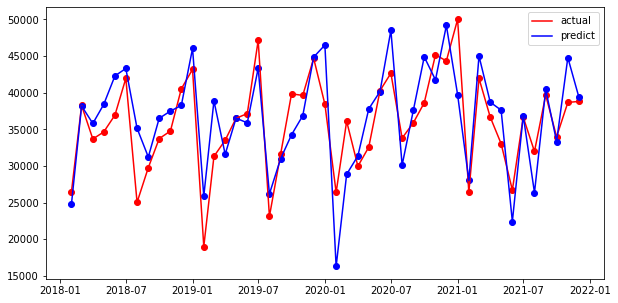

In [3403]:
plt.plot(df_model.loc['2018-02-01':'2021-12-01','sum'].index,df_model.loc['2018-02-01':'2021-12-01','sum'],color = 'red')
plt.plot(df_model.index[72:len(df_model.index)-3],ans_ans,color = 'blue') #3
plt.scatter(df_model.loc['2018-02-01':'2021-12-01','sum'].index,df_model.loc['2018-02-01':'2021-12-01','sum'], color = 'red')
plt.scatter(df_model.index[72:len(df_model.index)-3],ans_ans,color = 'blue') #3
plt.legend(['actual','predict'])

In [3404]:
error_percent = (df_model.loc['2018-02-01':'2021-12-01','sum'].values - np.array(ans_ans))/df_model.loc['2018-02-01':'2021-12-01','sum'].values
error_percent

array([0.06334971882652311, 0.0019305904167817925, -0.06290288055713332,
       -0.108604040682566, -0.14499045455299409, -0.0321211843617466,
       -0.40408990373254694, -0.04883597123151447, -0.08231185707261801,
       -0.07829221417691307, 0.055988677771428214, -0.06630364004631273,
       -0.3626340137039732, -0.2424361362513064, 0.05748395013026027,
       -0.0002993604209306854, 0.03400603498103808, 0.08059190765528888,
       -0.1328764278384186, 0.020246526555042776, 0.1402536223023858,
       0.06989651062706333, -0.0034962332729282647, -0.2103781225355203,
       0.38327649185004864, 0.20074699500099752, -0.047055543037329645,
       -0.16027426087587748, 0.002937097414504831, -0.1371908698485669,
       0.10891949734788368, -0.047772143946197276, -0.16250889348226336,
       0.0757885004488911, -0.10922609204204094, 0.2054089705444835,
       -0.06156772254178019, -0.07263553348819783, -0.05548481628422935,
       -0.13868215980470372, 0.16119792791400006, -0.0054550888350

In [3405]:
error_percent = np.abs(df_model.loc['2021-02-01':'2021-12-01','sum'].values - np.array(ans_ans[-11:]))/np.array(ans_ans[-11:])

In [3406]:
pd.DataFrame([df_model.loc['2021-02-01':'2021-12-01','sum'].index,error_percent]).T

,0,1
0,2021-02-01,0.057997
1,2021-03-01,0.067717
2,2021-04-01,0.052568
3,2021-05-01,0.121792
4,2021-06-01,0.192176
5,2021-07-01,0.005425
6,2021-08-01,0.213718
7,2021-09-01,0.018931
8,2021-10-01,0.019203
9,2021-11-01,0.136729


In [3407]:
np.mean(error_percent)

0.08210674754649415

In [3408]:
df_model.loc['2021-08-01']

sum                                31974
oil_sc                          0.040162
steel_sc                        2.172025
CPI_sc                          1.793823
CPIT_sc                         0.424267
economicgrowth_sc               0.424267
gdp_sc                         -0.130183
incomeaverage_sc                1.747118
covid_sc                        0.193374
industry_sc                     2.268835
stock_sc                        2.447554
last_sell                          36665
恐慌_last_month                       -3.0
塞港_last_month                        1.0
diff                               -4691
oil_sc_last_month               0.196808
steel_sc_last_month             2.172025
CPI_sc_last_month               1.545134
economicgrowth_sc_last_month    0.480355
gdp_sc_last_month              -0.130183
incomeaverage_sc_last_month     1.747118
covid_sc_last_month             0.781839
industry_sc_last_month          2.112039
stock_sc_last_month             2.362323
CPIT_sc_last_mon

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<AxesSubplot:ylabel='Density'>

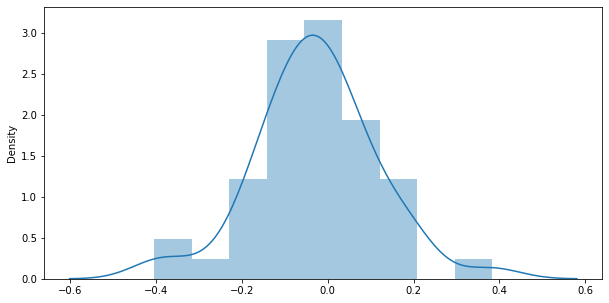

In [3409]:
sns.distplot((df_model.loc['2018-02-01':'2021-12-01','sum'].values - np.array(ans_ans))/df_model.loc['2018-02-01':'2021-12-01','sum'].values)

In [3765]:
# 01101112  0.09574346949897677
# 11111112  0.09038464748792932
# 11111112  0.07999236314794994 time_varying_regression = False trend = 'n' mel_regression = False measurement_error = True
# 01101112  0.07502065881558477 time_varying_regression = False trend = 'n' mel_regression = False measurement_error = True
ans_ans = []
for x in range(70,len(df_model.index)-16):  #4
    s = SARIMAX(
                df_model.loc[:df_model.index[x],'sum'].astype(int).values,
                order = (0,1,1),
                seasonal_order=(0,1,1,12),
                exog = df_model.loc[:df_model.index[x],[                                   
                                    'last_sell',
                                    'incomeaverage_sc_last_month',
                                    'stock_sc_last_month', 
                                    'CPI_sc_last_month',
                                    'economicgrowth_sc_last_month']],
                trend = 'n',
                time_varying_regression=False,
                mle_regression=False,
                measurement_error = True,
                enforce_stationary = False
            )
    result = s.fit()
    ans = result.get_forecast(steps = 1, exog = df_model.loc[df_model.index[x+1],[
                                 'last_sell',
                                 'incomeaverage_sc_last_month',
                                 'stock_sc_last_month',
                                 'CPI_sc_last_month',
                                 'economicgrowth_sc_last_month']].astype(float))
    ans_ans.append(ans.predicted_mean.values[0])


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47639D+00    |proj g|=  3.62680D-01

At iterate    5    f=  7.27803D+00    |proj g|=  1.39630D-03

At iterate   10    f=  7.27799D+00    |proj g|=  3.01163D-04

At iterate   15    f=  7.24706D+00    |proj g|=  2.41998D-02

At iterate   20    f=  7.23743D+00    |proj g|=  1.93625D-02

At iterate   25    f=  7.22874D+00    |proj g|=  3.97182D-03
  ys=-4.062E-03  -gs= 4.253E-04 BFGS update SKIPPED

At iterate   30    f=  7.22706D+00    |proj g|=  7.21131D-04

At iterate   35    f=  7.22667D+00    |proj g|=  5.99618D-05

At iterate   40    f=  7.22662D+00    |proj g|=  7.99205D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  7.30460D+00    |proj g|=  2.41568D-03

At iterate   20    f=  7.29537D+00    |proj g|=  3.35602D-02

At iterate   25    f=  7.25880D+00    |proj g|=  1.05364D-02

At iterate   30    f=  7.25519D+00    |proj g|=  8.52442D-04

At iterate   35    f=  7.25479D+00    |proj g|=  3.84911D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     41      1     0     0   7.486D-06   7.255D+00
  F =   7.2547538796183932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.33139D+00    |proj g|=  1.48358D-03

At iterate   10    f=  7.33135D+00    |proj g|=  1.09969D-04

At iterate   15    f=  7.33122D+00    |proj g|=  1.85562D-03

At iterate   20    f=  7.32082D+00    |proj g|=  2.74126D-02

At iterate   25    f=  7.28177D+00    |proj g|=  8.09370D-03

At iterate   30    f=  7.27891D+00    |proj g|=  1.96535D-03

At iterate   35    f=  7.27846D+00    |proj g|=  1.24562D-04

At iterate   40    f=  7.27843D+00    |proj g|=  1.50414D-05

At iterate   45    f=  7.27842D+00    |proj g|=  4.09207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     75   

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  7.34549D+00    |proj g|=  3.54904D-02

At iterate   25    f=  7.30629D+00    |proj g|=  1.01592D-02

At iterate   30    f=  7.30271D+00    |proj g|=  1.36481D-03

At iterate   35    f=  7.30241D+00    |proj g|=  3.51241D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     43      1     0     0   8.663D-06   7.302D+00
  F =   7.3023665422945241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.37919D+00    |proj g|=  1.79243D-03

At iterate   10    f=  7.37914D+00    |proj g|=  1.51826D-04

At iterate   15    f=  7.37900D+00    |proj g|=  2.53267D-03

At iterate   20    f=  7.36885D+00    |proj g|=  3.58482D-02

At iterate   25    f=  7.33026D+00    |proj g|=  9.75551D-03

At iterate   30    f=  7.32681D+00    |proj g|=  8.02850D-04

At iterate   35    f=  7.32657D+00    |proj g|=  6.24749D-05

At iterate   40    f=  7.32652D+00    |proj g|=  1.50867D-05

At iterate   45    f=  7.32651D+00    |proj g|=  4.37370D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     76   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54882D+00    |proj g|=  2.95484D-01

At iterate    5    f=  7.40223D+00    |proj g|=  1.68217D-03

At iterate   10    f=  7.40218D+00    |proj g|=  6.68728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     51      1     0     0   6.687D-04   7.402D+00
  F =   7.4021843566560550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   30    f=  7.37996D+00    |proj g|=  1.94552D-03

At iterate   35    f=  7.37962D+00    |proj g|=  5.39901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     42      1     0     0   4.575D-06   7.380D+00
  F =   7.3795883480179265     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54333D+00    |proj g|=  1.71343D-01

At iterate    5    f=  7.45278D+00    |proj g|=  1.69839D-04

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  7.42578D+00    |proj g|=  4.44407D-02

At iterate   25    f=  7.40693D+00    |proj g|=  4.10242D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.40649D+00    |proj g|=  2.45431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     88      2     0     0   2.452D-04   7.406D+00
  F =   7.4064922772912363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.53441D+00    |proj g|=  1.00925D-01

At iterate    5    f=  7.48834D+00    |proj g|=  1.84752D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     22      1     0     0   7.648D-05   7.488D+00
  F =   7.4883394348061145     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56009D+00    |proj g|=  1.02316D-01

At iterate    5    f=  7.50993D+00    |proj g|=  8.16398D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     62      2     0     0   8.164D-04   7.510D+00
  F =   7.5099265240511404     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.57480D+00    |proj g|=  9.99729D-02

At iterate    5    f=  7.53091D+00    |proj g|=  5.77307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.59589D+00    |proj g|=  9.83235D-02

At iterate    5    f=  7.55205D+00    |proj g|=  1.87941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     31      1     0     0   9.096D-05   7.552D+00
  F =   7.5520475493050325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61684D+00    |proj g|=  9.61929D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  7.57279D+00    |proj g|=  1.15248D-03


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     91      3     0     0   1.152D-03   7.573D+00
  F =   7.5727865952707409     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63940D+00    |proj g|=  9.75480D-02

At iterate    5    f=  7.59166D+00    |proj g|=  3.80679D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     64      2     0     0   1.763D-04   7.592D+00
  F =   7.5916558820531677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66295D+00    |proj g|=  9.43748D-02

At iterate    5    f=  7.61426D+00    |proj g|=  4.05586D-04


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     40      2     0     0   1.965D-04   7.614D+00
  F =   7.6142592930126805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68863D+00    |proj g|=  9.46047D-02

At iterate    5    f=  7.63599D+00    |proj g|=  1.56232D-04

At iterate   10    f=  7.63598D+00    |proj g|=  3.25729D-04

At iterate   15    f=  7.63558D+00    |proj g|=  5.17256D-03

At iterate   20    f=  7.59234D+00    |proj g|=  6.84094D-02

At iterate   25    f=  7.56345D+00    |proj g|=  1.52138D-03

At iterate   30    f=  7.56278D+00    |proj g|=  5.00169D-04

At iterate   35    f=  7.56268D+00    |proj g|=  1.11145D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.65909D+00    |proj g|=  1.88692D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     49      2     0     0   8.713D-05   7.659D+00
  F =   7.6590924800858984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73381D+00    |proj g|=  1.01189D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.67730D+00    |proj g|=  6.37914D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     52      2     0     0   6.379D-04   7.677D+00
  F =   7.6772961353397164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.74736D+00    |proj g|=  9.43186D-02

At iterate    5    f=  7.69272D+00    |proj g|=  2.29135D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/si


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     37      1     0     0   3.271D-04   7.719D+00
  F =   7.7187247444722793     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.78363D+00    |proj g|=  9.12719D-02

At iterate    5    f=  7.73763D+00    |proj g|=  3.63564D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.79997D+00    |proj g|=  9.27774D-02

At iterate    5    f=  7.75314D+00    |proj g|=  3.04696D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     54      2     0     0   2.277D-02   7.753D+00
  F =   7.7531426502383933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.82314D+00    |proj g|=  9.26309D-02

At iterate    5    f=  7.78265D+00    |proj g|=  1.37774D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.84292D+00    |proj g|=  9.93836D-02

At iterate    5    f=  7.79658D+00    |proj g|=  1.61246D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     24      1     0     0   1.473D-04   7.797D+00
  F =   7.7965800305480304     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85637D+00    |proj g|=  9.95971D-02

At iterate    5    f=  7.80952D+00    |proj g|=  1.04136D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     27      1     0     0   8.862D-05   7.810D+00
  F =   7.8095200285935995     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.92684D+00    |proj g|=  8.75296D-02

At iterate    5    f=  7.87567D+00    |proj g|=  1.62009D-03

At iterate   10    f=  7.87560D+00    |proj g|=  1.74327D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     45      1     0     0   1.742D-04   7.876D+00
  F =   7.8756006162148475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  7.84879D+00    |proj g|=  1.48443D-03

At iterate   25    f=  7.84809D+00    |proj g|=  2.35085D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     37      1     0     0   2.098D-04   7.848D+00
  F =   7.8480799562515307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.97691D+00    |proj g|=  1.08674D-01

At iterate    5    f=  7.91348D+00    |proj g|=  3.40325D-03

At iterate   10    f=  7.91333D+00    |proj g|=  4.01158D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     55      1     0     0   3.906D-04   7.913D+00
  F =   7.9133258060181406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.93071D+00    |proj g|=  1.03259D-03

At iterate   10    f=  7.93069D+00    |proj g|=  2.62621D-04

At iterate   15    f=  7.93050D+00    |proj g|=  3.98139D-03

At iterate   20    f=  7.89401D+00    |proj g|=  2.83086D-02

At iterate   25    f=  7.87371D+00    |proj g|=  5.92054D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     36      1     0     0   4.645D-06   7.874D+00
  F =   7.8737055259867175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02310D+00    |proj g|=  1.14709D-01

At iterate    5    f=  7.95402D+00    |proj g|=  7.30197D-04

At iterate   10    f=  7.95401D+00    |proj g|=  7.95541D-05

At iterate   15    f=  7.95400D+00    |proj g|=  4.95448D-04

At iterate   20    f=  7.95298D+00    |proj g|=  2.62493D-03

At iterate   25    f=  7.89723D+00    |proj g|=  1.03431D-02

At iterate   30    f=  7.89697D+00    |proj g|=  1.25474D-02

At iterate   35    f=  7.89617D+00    |proj g|=  6.31292D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   40    f=  7.89579D+00    |proj g|=  1.08126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40    101      1     0     0   1.081D-04   7.896D+00
  F =   7.8957856155393076     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03943D+00    |proj g|=  1.22153D-01

At iterate    5    f=  7.96769D+00    |proj g|=  8.11932D-04

At iterate   10    f=  7.96768D+00    |proj g|=  8.77415D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     82      2     0     0   2.087D-04   7.968D+00
  F =   7.9676792627788489     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05007D+00    |proj g|=  1.19326D-01

At iterate    5    f=  7.98317D+00    |proj g|=  8.47595D-04

At iterate   10    f=  7.98315D+00    |proj g|=  2.18758D-04


 This problem is unconstrained.



At iterate   15    f=  7.98288D+00    |proj g|=  2.31113D-03

At iterate   20    f=  7.92796D+00    |proj g|=  4.16214D-02

At iterate   25    f=  7.92188D+00    |proj g|=  2.29912D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     54      1     0     0   2.815D-02   7.922D+00
  F =   7.9218781360689343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.07136D+00    |proj g|=  1.21599D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  7.99758D+00    |proj g|=  9.76475D-05

At iterate   15    f=  7.99757D+00    |proj g|=  2.61669D-04

At iterate   20    f=  7.99744D+00    |proj g|=  3.33818D-03

At iterate   25    f=  7.93483D+00    |proj g|=  1.28544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     81      1     0     0   1.199D-04   7.935D+00
  F =   7.9348262719319074     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  8.00831D+00    |proj g|=  1.56109D-04

At iterate   15    f=  8.00754D+00    |proj g|=  2.06013D-03

At iterate   20    f=  7.94551D+00    |proj g|=  9.51789D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   25    f=  7.94475D+00    |proj g|=  2.97676D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     77      1     0     0   2.977D-04   7.945D+00
  F =   7.9447497555371305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08702D+00    |proj g|=  1.15633D-01

At iterate    5    f=  8.02567D+00    |proj g|=  1.94596D-03

At iterate   10    f=  8.02556D+00    |proj g|=  8.57318D-05

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     56      2     0     0   9.072D-05   8.041D+00
  F =   8.0413479348862200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [3766]:
np.where(df_model.index == '2020-12-01')

(array([106]),)

In [3767]:
df_model.index[70]

Timestamp('2017-12-01 00:00:00')

In [3768]:
error_percent = np.mean(np.abs(df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'] - ans_ans)/df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'])

In [3769]:
error_percent

0.07031442714859602

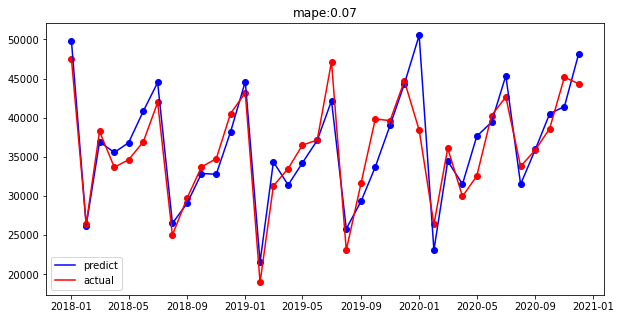

In [3770]:
plt.plot(df_model.index[71:107],ans_ans,color = 'blue')
plt.scatter(df_model.index[71:107],ans_ans,color = 'blue')
plt.plot(df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'].index,df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'],color = 'red')
plt.scatter(df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'].index,df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'],color = 'red')
plt.title('mape:'+str(error_percent.round(3)))
plt.legend(['predict','actual'])

In [3771]:
error_percent = np.mean(np.abs(df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'] - ans_ans)/df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'])

In [3618]:
df_model.columns

Index(['sum', 'oil_sc', 'steel_sc', 'CPI_sc', 'CPIT_sc', 'economicgrowth_sc',
       'gdp_sc', 'incomeaverage_sc', 'covid_sc', 'industry_sc', 'stock_sc',
       'last_sell', '恐慌_last_month', '塞港_last_month', 'diff',
       'oil_sc_last_month', 'steel_sc_last_month', 'CPI_sc_last_month',
       'economicgrowth_sc_last_month', 'gdp_sc_last_month',
       'incomeaverage_sc_last_month', 'covid_sc_last_month',
       'industry_sc_last_month', 'stock_sc_last_month', 'CPIT_sc_last_month'],
      dtype='object')

In [3712]:
df_model

,sum,oil_sc,steel_sc,CPI_sc,CPIT_sc,economicgrowth_sc,gdp_sc,incomeaverage_sc,covid_sc,industry_sc,...,oil_sc_last_month,steel_sc_last_month,CPI_sc_last_month,economicgrowth_sc_last_month,gdp_sc_last_month,incomeaverage_sc_last_month,covid_sc_last_month,industry_sc_last_month,stock_sc_last_month,CPIT_sc_last_month
date,,,,,,,,,,,,,,,,,,,,,
2012-02-01,21369.0,1.919145,0.456439,-2.205587,0.861752,0.861752,7.681146,-1.597193,-0.159479,-1.537102,...,1.457634,0.456439,-1.683748,0.839316,7.681146,-1.597193,-0.159479,-1.975550,-1.052225,0.839316
2012-03-01,32029.0,1.937146,0.456439,-2.205587,0.861752,0.861752,-0.130197,-1.597193,-0.159479,-1.537102,...,1.919145,0.456439,-2.205587,0.861752,7.681146,-1.597193,-0.159479,-1.537102,-0.840144,0.861752
2012-04-01,27782.0,1.779734,0.628721,-1.797900,1.509565,1.509565,-0.130193,-1.758702,-0.159479,-1.004285,...,1.937146,0.456439,-2.205587,0.861752,-0.130197,-1.597193,-0.159479,-1.537102,-0.840144,0.861752
2012-05-01,30129.0,1.117532,0.628721,-1.602210,1.226322,1.226322,-0.130193,-1.758702,-0.159479,-0.782157,...,1.779734,0.628721,-1.797900,1.509565,-0.130193,-1.758702,-0.159479,-1.004285,-1.057615,1.509565
2012-06-01,29362.0,0.902288,0.628721,-1.349444,0.889795,0.889795,-0.130193,-1.758702,-0.159479,-1.161807,...,1.117532,0.628721,-1.602210,1.226322,-0.130193,-1.758702,-0.159479,-0.782157,-1.127876,1.226322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,38667,-0.066694,2.688872,2.087358,0.945883,0.945883,-0.130180,2.652094,0.056968,2.305131,...,0.414350,2.688872,1.985436,0.693488,-0.130180,2.652094,0.046822,2.199874,2.271084,0.693488
2021-12-01,38807,0.182254,2.688872,2.001743,0.514007,0.514007,-0.130180,2.652094,0.337672,2.575895,...,-0.066694,2.688872,2.087358,0.945883,-0.130180,2.652094,0.056968,2.305131,2.425611,0.945883
2022-01-01,39654,0.757132,2.516590,2.246356,1.030015,1.030015,NaN,NaN,NaN,2.444505,...,0.182254,2.688872,2.001743,0.514007,-0.130180,2.652094,0.337672,2.575895,2.703215,0.514007


In [3715]:
from sklearn.ensemble import RandomForestRegressor
X = df_model.iloc[:-4,[11,15,16,17,18,19,20,21,22,23,24]]
y = df_model.iloc[:-4,0]

In [3716]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [3717]:
print(model.feature_importances_)

[0.41582636 0.05599455 0.01900523 0.07209943 0.03222716 0.04761396
 0.06270791 0.02667401 0.0573553  0.1764173  0.03407881]


In [3731]:
list(zip(X.columns,model.feature_importances_)).sort(key = lambda x:x[1])


In [3732]:
a = list(zip(X.columns,model.feature_importances_))
a.sort(key = lambda x:x[1])

In [3733]:
a

[('steel_sc_last_month', 0.0190052292364318),
 ('covid_sc_last_month', 0.026674006166089323),
 ('economicgrowth_sc_last_month', 0.03222715681723088),
 ('CPIT_sc_last_month', 0.03407880503952599),
 ('gdp_sc_last_month', 0.04761395591899094),
 ('oil_sc_last_month', 0.05599454580882792),
 ('industry_sc_last_month', 0.05735529799344778),
 ('incomeaverage_sc_last_month', 0.06270791254396621),
 ('CPI_sc_last_month', 0.07209943418598042),
 ('stock_sc_last_month', 0.17641730049736076),
 ('last_sell', 0.41582635579214816)]

In [3772]:
df_model.to_csv('/Users/xuzhejia/Desktop/商務數據/模型用表格.csv')